In [7]:
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
# Q = 173.183 (G-1.9)^(1.858)

In [9]:
Hoshangabad_data=pd.read_csv("Hoshangabad_Discharge.csv")
Hoshangabad_data

,year,month,day,discharge
0,2001,1,1,105.9
1,2001,1,2,116.2
2,2001,1,3,119.5
3,2001,1,4,120.7
4,2001,1,5,109.4
...,...,...,...,...
7300,2020,12,27,NaN
7301,2020,12,28,NaN
7302,2020,12,29,NaN
7303,2020,12,30,NaN


In [10]:
# Define the formula as a function
def calculate_stage(discharge):
    return ((discharge / 173.183) ** (1/1.858)) + 1.9

# Apply the formula to the 'discharge' column and store the result in a new column 'Calculated Stage'
Hoshangabad_data['Calculated Stage'] = Hoshangabad_data['discharge'].apply(calculate_stage)

# Print the DataFrame with the calculated Stage values
print(Hoshangabad_data[['discharge', 'Calculated Stage']])




      discharge  Calculated Stage
0         105.9          2.667419
1         116.2          2.706730
2         119.5          2.718981
3         120.7          2.723397
4         109.4          2.680968
...         ...               ...
7300        NaN               NaN
7301        NaN               NaN
7302        NaN               NaN
7303        NaN               NaN
7304        NaN               NaN

[7305 rows x 2 columns]


In [11]:
# Save the modified DataFrame as a new CSV file
Hoshangabad_data.to_csv('modified_data_1.csv', index=False)

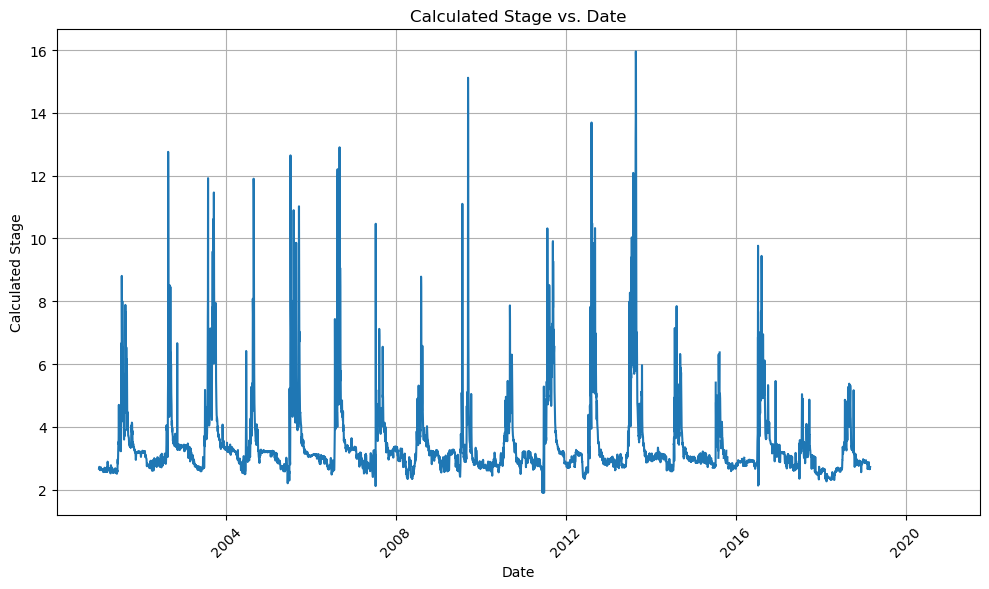

In [12]:


# Read the CSV file into a DataFrame
data = pd.read_csv('modified_data_1.csv')


# Convert the 'date' column to a datetime format
data['date'] = pd.to_datetime(data[['year', 'month', 'day']])

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(data['date'], data['Calculated Stage'])
plt.xlabel('Date')
plt.ylabel('Calculated Stage')
plt.title('Calculated Stage vs. Date')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


In [14]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from datetime import datetime

# Read the data from the CSV file
df = pd.read_csv('modified_data_1.csv')
# Convert the 'Day' column to a datetime format
df['Day'] = pd.to_datetime(df['Day'], format='%d/%m/%y')


# Filter the DataFrame based on the date range
data_first_year = df[(df['Day'] >= '2011-01-01') & (df['Day'] <= '2011-12-30')]
data_second_year = df[(df['Day'] >= '2012-01-01') & (df['Day'] <= '2012-12-30')]



# Create a DataFrame for the second year data
df_second_year = pd.DataFrame(data_second_year)

# Create a linear regression model
model = LinearRegression()

# Fit the model using data from the first year
X = df_first_year[['Discharge (cumecs)']]
y = df_first_year['Mean Gauge (m)']
model.fit(X, y)

# Use the model to predict 'Mean Gauge (m)' for the second year
X_second_year = df_second_year[['Discharge (cumecs)']]
predicted_mean_gauge = model.predict(X_second_year)

# Add the predicted values to the second-year DataFrame
df_second_year['Predicted Mean Gauge (m)'] = predicted_mean_gauge

# Print the DataFrame with predicted values
print(df_second_year)


KeyError: 'Day'